In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing
from scipy.special import boxcox, inv_boxcox

<Axes: xlabel='Date'>

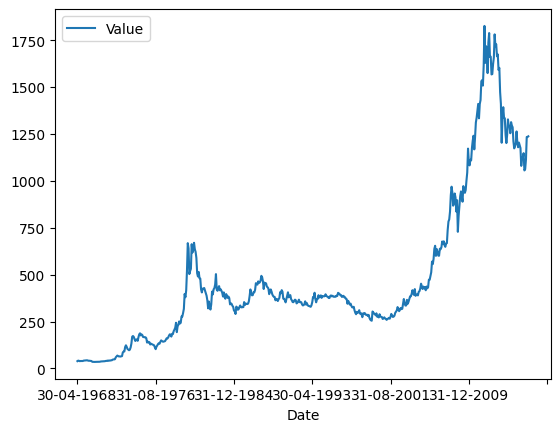

In [6]:
bank= pd.read_csv("BUNDESBANK-BBK01_WT5511.csv", index_col=0)
bank.plot()

In [10]:
bank.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


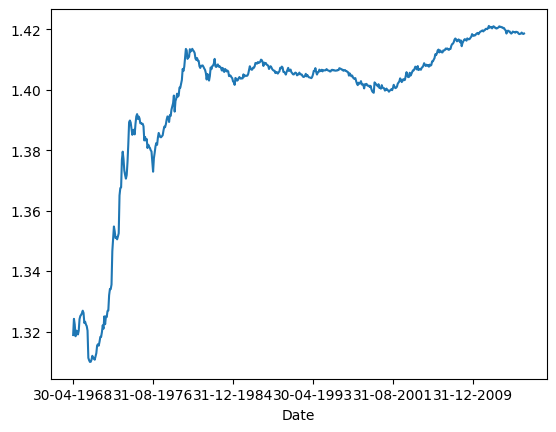

((565,), (12,))

In [25]:
lamb= -0.7
y= bank['Value']
y_train = y[:-12]
y_test = y[-12:]
y_trans_trn= boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()
y_train.shape, y_test.shape

In [26]:
model= auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-5641.114, Time=3.60 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-5462.654, Time=0.19 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-5590.912, Time=1.51 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-5682.012, Time=1.21 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=-5674.590, Time=0.26 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=-5680.005, Time=1.24 sec
 ARIMA(0,2,1)(0,0,2)[12]             : AIC=-5661.024, Time=1.99 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=-5687.929, Time=1.16 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=-5685.830, Time=2.57 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=-5678.039, Time=1.77 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=-5473.215, Time=0.68 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=-5699.694, Time=0.86 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=-5686.684, Time=0.37 sec
 ARIMA(1,2,1)(2,0,0)[12]             : AIC=-5697.629, Time=2.43 sec
 ARIM

In [27]:
y_pred= model.predict(n_periods=len(y_test))
y_test.values, y_pred.values                  

(array([1190.4 , 1175.  , 1080.05, 1125.5 , 1122.5 , 1147.75, 1055.65,
        1062.25, 1112.9 , 1234.15, 1233.6 , 1237.7 ]),
 array([1.41859921, 1.41862633, 1.41858546, 1.41855546, 1.41847005,
        1.41841425, 1.41839951, 1.41838779, 1.41841559, 1.41834371,
        1.41829709, 1.41829418]))

In [28]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred,lamb))

77.05753825606772

In [29]:
          ## BOXCOX with ausgas                                                                                               

<Axes: xlabel='Month'>

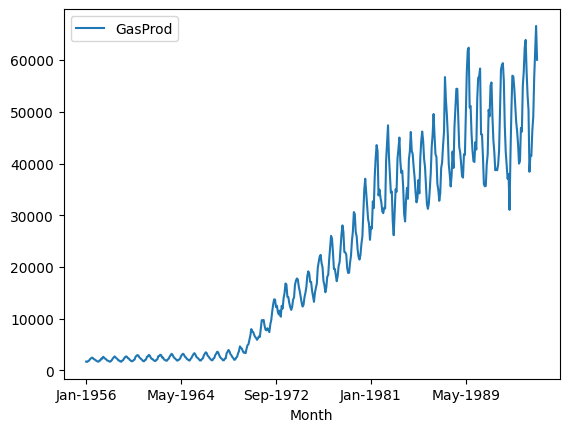

In [32]:
gas= pd.read_csv("AusGas.csv", index_col=0)
gas.plot()

In [34]:
gas.head()

,GasProd
Month,
Jan-1956,1709
Feb-1956,1646
Mar-1956,1794
Apr-1956,1878
May-1956,2173


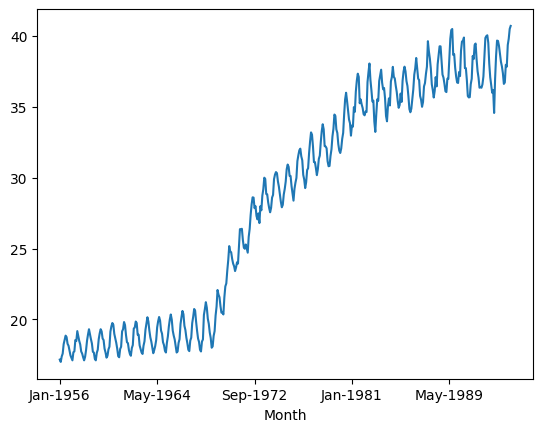

((464,), (12,))

In [49]:
lamb= 0.2
y = gas['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_trans_trn= boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()
y_train.shape, y_test.shape

In [50]:
model= auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=578.135, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=951.615, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=895.744, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=914.982, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=952.252, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=897.437, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=879.314, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=529.511, Time=1.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=733.966, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=510.380, Time=2.00 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=692.760, Time=0.77 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=542.134, Time=2.13 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=521.440, Time=1.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=574.004, Time=1.37 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=667.5

In [51]:
y_pred= model.predict(n_periods=len(y_test))
y_test.values, y_pred.values                  

(array([57784, 53231, 50354, 38410, 41600, 41471, 46287, 49013, 56624,
        61739, 66600, 60054], dtype=int64),
 array([40.1008199 , 39.26286855, 38.36745909, 37.5733662 , 37.19874191,
        37.28886476, 37.88411375, 38.78410023, 39.81453182, 40.65866619,
        41.15750695, 41.13906063]))

In [52]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred,lamb))

3021.8920838080867

In [53]:
model= auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=409.132, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=951.615, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=536.353, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=745.125, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=952.252, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=529.147, Time=2.87 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=523.358, Time=2.24 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=419.635, Time=5.65 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=428.980, Time=5.66 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=578.135, Time=1.03 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=463.668, Time=5.18 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=397.539, Time=6.11 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=394.738, Time=5.13 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept  

In [54]:
y_pred= model.predict(n_periods=len(y_test))
y_test.values, y_pred.values                  


(array([57784, 53231, 50354, 38410, 41600, 41471, 46287, 49013, 56624,
        61739, 66600, 60054], dtype=int64),
 array([39.65122664, 39.09719859, 38.51875149, 37.91677478, 37.47684002,
        37.62910783, 38.25769434, 38.51827012, 39.96385648, 40.60167513,
        41.14539162, 41.06975845]))

In [55]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, inv_boxcox(y_pred,lamb))

3423.927797462502

In [57]:
####### HW with damped

In [ ]:
lamb= 0.2
y_trans_trn= boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [ ]:
hw_ml = ExponentialSmoothing(y_trans_trn,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_ml.fit()
fcast3=fit3.forecast(len(y_test))
fcast3= inv_coxbox(fcast3,lamb)
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(he_ml_fcast,hw_ml_fcast) ,2)
y_test.index= hw_ml_fcast.index
plt.text(0.25,150,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()